# 2019년/2020년 특정 지역 월별 여행 횟수

In [1350]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns

In [1351]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

In [1352]:
# 폰트
font_path = '../malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font_name)

In [1353]:
month = ['1월','2월','3월','4월','5월','6월','7월','8월']

In [1354]:
test = pd.DataFrame({'여행월': month, '여행 횟수':0})

## 2019년 데이터 전처리

In [1355]:
# 데이터 불러오기
df_2019 = pd.read_csv('./tmap_prep_ver2/tmap_19_real_final.csv', index_col=0)
# 리셋 인덱스
df_2019.reset_index(drop= True, inplace= True)
# '지역 시군구'와 '여행월'로 정렬
df_2019.sort_values(['지역 시군구', '여행월'], inplace= True)
# 정렬 후 reset index
df_2019.reset_index(drop=True, inplace= True)
a_list = []
for i in range(0, len(df_2019)):
    if df_2019['지역 시군구'][i] == '경북 영천시':
        data = df_2019.iloc[i]
        a_list.append(data)
df2_2019 = pd.DataFrame(a_list)
df2_2019.reset_index(drop=True, inplace=True)

In [1356]:
max = df2_2019['여행 횟수'].max()

In [1357]:
df3_2019 = df2_2019
del df3_2019['지역 시군구']

df3_2019 = df3_2019[['여행월', '여행 횟수']]

concat_2019 = pd.concat([test, df3_2019], axis= 'rows', ignore_index= True)
concat_2019.drop_duplicates(['여행월'], keep= 'last', inplace= True)

concat_2019.reset_index(drop= True,inplace= True)

concat_2019.rename(columns = {'여행 횟수' : '2019 여행 횟수'}, inplace = True)

concat_2019 = concat_2019.set_index(['여행월'])

In [1358]:
concat_2019.reset_index(inplace= True)

In [1359]:
change_2019 = pd.DataFrame({'여행월':month})

In [1360]:
change_2019['증감'] = 0

In [1361]:
for i in range(0, len(concat_2019)-1):
    change_2019['증감'][i+1] = concat_2019['2019 여행 횟수'][i+1] - concat_2019['2019 여행 횟수'][i]

c:\users\007\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [1362]:
concat_2019 = concat_2019.set_index('여행월')

In [1363]:
change_2019 = change_2019.set_index('여행월')

## 2020년 데이터 전처리

In [1364]:
# 데이터 불러오기
df_2020 = pd.read_csv('./tmap_prep_ver2/tmap_20_real_final.csv', index_col=0)
# 리셋 인덱스
df_2020.reset_index(drop= True,inplace= True)
# '지역 시군구'와 '여행월'로 정렬
df_2020.sort_values(['지역 시군구', '여행월'], inplace= True)
# 정렬 후 reset index
df_2020.reset_index(drop=True, inplace= True)
a_list = []
for i in range(0, len(df_2020)):
    if df_2020['지역 시군구'][i] == '경북 영천시':
        data = df_2020.iloc[i]
        a_list.append(data)
df2_2020 = pd.DataFrame(a_list)
df2_2020.reset_index(drop=True, inplace=True)

In [1365]:
df3_2020 = df2_2020
del df3_2020['지역 시군구']

df3_2020 = df3_2020[['여행월', '여행 횟수']]

concat_2020 = pd.concat([test, df3_2020], axis= 'rows', ignore_index= True)
concat_2020.drop_duplicates(['여행월'], keep= 'last', inplace= True)

concat_2020.reset_index(drop= True,inplace= True)

concat_2020.rename(columns = {'여행 횟수' : '2020 여행 횟수'}, inplace = True)

concat_2020 = concat_2020.set_index(['여행월'])

In [1366]:
concat_2020.reset_index(inplace= True)
change_2020 = pd.DataFrame({'여행월':month})
change_2020['증감'] = 0
for i in range(0, len(concat_2020)-1):
    change_2020['증감'][i+1] = concat_2020['2020 여행 횟수'][i+1] - concat_2020['2020 여행 횟수'][i]
concat_2020 = concat_2020.set_index('여행월')
change_2020 = change_2020.set_index('여행월')

c:\users\007\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [1367]:
concat_total = pd.concat([concat_2019, concat_2020], axis= 'columns', ignore_index=False)

In [1368]:
change_2019['년도'] = 2019
change_2020['년도'] = 2020
change_total = pd.concat([change_2019, change_2020],axis='rows')

## 그림 그리기 4

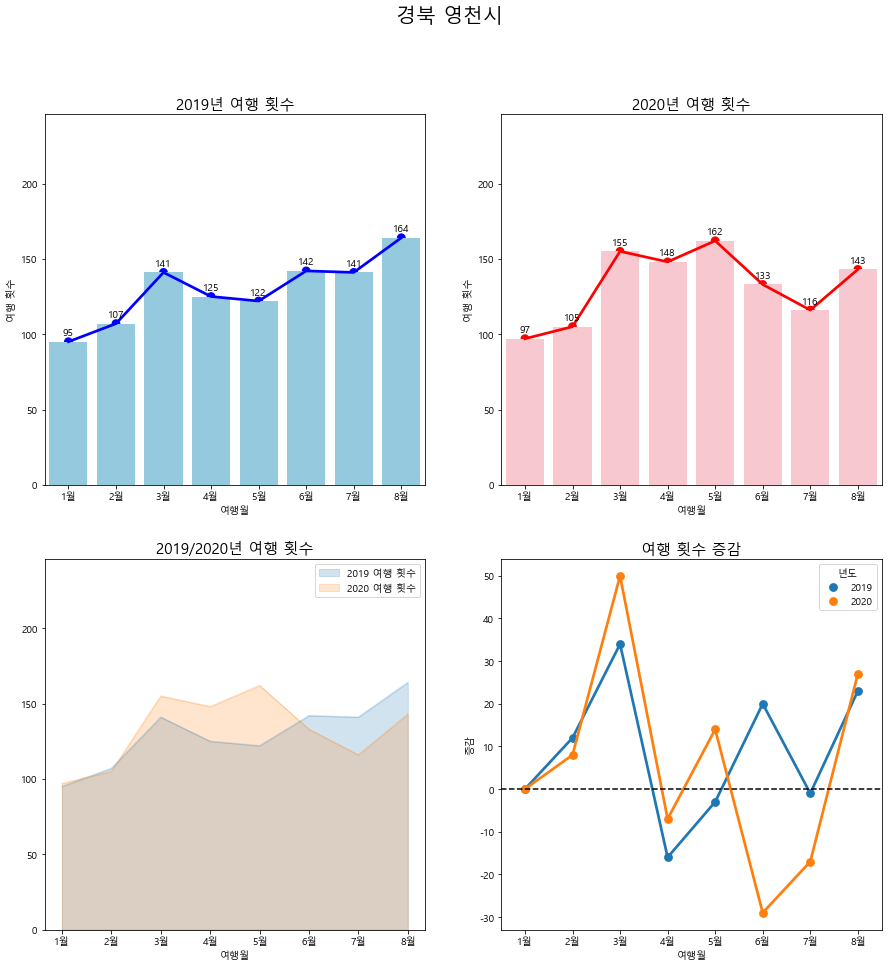

In [1369]:
fig = plt.figure(figsize = (15, 15))
fig.suptitle('경북 영천시', size= 20)
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2) 
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

travel_2019 = sns.barplot(data = df2_2019, x= '여행월', y= '여행 횟수', ax= ax1, color= 'skyblue')
travel_2019 = sns.pointplot(data = df2_2019, x= '여행월', y= '여행 횟수', ax= ax1, color= 'b')
travel_2019.set_title('2019년 여행 횟수', size = 15) 
for p in travel_2019.patches:
    travel_2019.annotate(format(p.get_height(), '1.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
travel_2019.set_ylim([0, max*1.5]) 

travel_2020 = sns.barplot(data = df2_2020, x= '여행월', y= '여행 횟수', ax= ax2, color= 'pink')
travel_2020 = sns.pointplot(data = df2_2020, x= '여행월', y= '여행 횟수', ax= ax2, color= 'r')
travel_2020.set_title('2020년 여행 횟수', size = 15) 
for p in travel_2020.patches:
    travel_2020.annotate(format(p.get_height(), '1.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
travel_2020.set_ylim([0, max*1.5]) 

together = concat_total.plot(kind= 'area',stacked= False, alpha= 0.2, ax= ax3)
together.set_title('2019/2020년 여행 횟수', size = 15) 
together.set_ylim([0, max*1.5])

labels = ['2019', '2020']
g_change_total = sns.pointplot(data = change_total, x= change_total.index, y= '증감', ax= ax4, hue= '년도')
ax4.set_title('여행 횟수 증감', size = 15) 
ax4.axhline(y=0, color = 'black', linestyle= '--')

In [1370]:
fig.savefig('./tmap_graph/경북 영천시.png')